In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
import cv2
import pydicom 
from pydicom import dcmread
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import nibabel as nib

In [4]:

##Put all non covid scans in a list and create a np arr containing all the image data (pixel_data)
#and stack them together vertically using np.vstack()
non_covid_dataset_arr=[]
for filename in os.listdir('/home/royal/PycharmProjects/learningML/venv/DCM_files'):
    file_path=os.path.join('/home/royal/PycharmProjects/learningML/venv/DCM_files', filename)
    data= pydicom.dcmread(file_path)
    non_covid_dataset_arr.append(cv2.resize(data.pixel_array,(128,128)).flatten())
    
    
print(len(non_covid_dataset_arr))
nc_stacked_arr=np.vstack(non_covid_dataset_arr)
print(nc_stacked_arr.shape)
# flattened_nc =nc_stacked_arr.flatten()
# flattened_nc.shape


395
(395, 16384)


In [5]:
len(non_covid_dataset_arr)

395

In [6]:
##Create a dataframe for the flattened covid images

nc_df= pd.DataFrame(nc_stacked_arr)

nc_df.shape

nc_df= pd.DataFrame(nc_df)
nc_df


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
1,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
2,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
3,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
4,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
391,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
392,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
393,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048


In [7]:
#Create target variable
nc_target= pd.DataFrame(np.full((395,1),0), columns=['Target'])
nc_target


,Target
0,0
1,0
2,0
3,0
4,0
...,...
390,0
391,0
392,0
393,0


In [87]:
# nc_df['Target']=
nc_df['label']= nc_target
nc_df



,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
1,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
2,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
3,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
4,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
391,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
392,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
393,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0


In [88]:
import os
import glob
data = {}
colnames = []
pt = "/home/royal/COVID-19-CT-Seg_20cases/"

for folder in sorted(os.listdir('{}'.format(pt))):
    if os.path.isfile(pt + folder):
        colnames.append(folder)
        print(folder)

#         fname = glob.glob(pt + folder + '/{}'.format('*.nii'))
#         print(fname)


#         data['{}'.format(folder)] = fname
       
# df = pd.DataFrame(data, columns=colnames)


coronacases_001.nii
coronacases_002.nii
coronacases_003.nii
coronacases_004.nii
coronacases_005.nii
coronacases_006.nii
coronacases_007.nii
coronacases_008.nii
coronacases_009.nii
coronacases_010.nii
radiopaedia_10_85902_1.nii
radiopaedia_10_85902_3.nii
radiopaedia_14_85914_0.nii
radiopaedia_27_86410_0.nii
radiopaedia_29_86490_1.nii
radiopaedia_29_86491_1.nii
radiopaedia_36_86526_0.nii
radiopaedia_40_86625_0.nii
radiopaedia_4_85506_1.nii
radiopaedia_7_85703_0.nii


In [10]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [11]:
covid_files=[]
for filename in os.listdir('/home/royal/COVID-19-CT-Seg_20cases/covid_cases'):
    file_path=os.path.join('/home/royal/COVID-19-CT-Seg_20cases/covid_cases', filename)
    covid_files.append(file_path)
covid_files

['/home/royal/COVID-19-CT-Seg_20cases/covid_cases/coronacases_002.nii',
 '/home/royal/COVID-19-CT-Seg_20cases/covid_cases/coronacases_001.nii']

In [12]:

##Put all non covid scans in a list and create a np arr containing all the image data (pixel_data)
#and stack them together vertically using np.vstack()
covid_dataset_arr=[]
for filename in os.listdir('/home/royal/COVID-19-CT-Seg_20cases/covid_cases'):
    file_path=os.path.join('/home/royal/COVID-19-CT-Seg_20cases/covid_cases', filename)
    covid_data= read_nii(file_path)
    print(covid_data.shape)
    covid_dataset_arr.append(cv2.resize(covid_data[:,:,:200],(128,128)))


    



        

(512, 512, 200)
(512, 512, 301)


In [13]:
t= np.array([covid_dataset_arr[0][:,:]]).shape


In [14]:
covid_images=[]
for i in range(200):
    covid_images.append(np.array([covid_dataset_arr[0][:,:,i]]).flatten())

for i in range(195):
    covid_images.append(np.array([covid_dataset_arr[0][:,:,i]]).flatten())


In [15]:
c_stacked= np.vstack(covid_images)
c_stacked.shape

(395, 16384)

In [16]:
c_stacked

array([[-1004.5 ,  -986.25, -1016.  , ...,  -999.  ,  -999.5 , -1004.25],
       [ -984.5 ,  -977.  , -1004.5 , ..., -1004.25,  -988.  , -1006.25],
       [ -988.5 ,  -996.25,  -995.  , ..., -1004.25,  -993.5 ,  -994.75],
       ...,
       [-1008.25,  -996.5 , -1007.75, ...,  -982.  ,  -982.25,  -955.25],
       [-1010.75,  -972.  , -1005.5 , ..., -1002.5 ,  -990.  ,  -969.5 ],
       [ -996.  ,  -962.  , -1000.  , ...,  -992.5 ,  -975.5 ,  -988.25]])

In [17]:
covid_df= pd.DataFrame(c_stacked)

In [18]:
covid_df

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,-1004.50,-986.25,-1016.00,-1005.00,-1005.00,-997.50,-1015.50,-995.75,-991.00,-991.75,...,-995.00,-962.25,-966.50,-1005.50,-969.50,-1013.75,-961.75,-999.00,-999.50,-1004.25
1,-984.50,-977.00,-1004.50,-993.50,-992.75,-1015.50,-1018.50,-998.75,-1006.50,-1002.25,...,-990.75,-979.75,-968.50,-1003.00,-968.00,-1002.25,-986.50,-1004.25,-988.00,-1006.25
2,-988.50,-996.25,-995.00,-988.75,-1003.75,-1007.00,-1003.25,-991.75,-1008.75,-1002.25,...,-1010.00,-994.00,-971.00,-1002.75,-961.00,-1017.50,-975.00,-1004.25,-993.50,-994.75
3,-998.00,-975.50,-1014.75,-991.00,-988.75,-1012.50,-1007.50,-1009.75,-991.50,-998.50,...,-1019.00,-993.00,-1001.25,-990.00,-974.50,-998.75,-989.75,-1007.00,-987.75,-973.25
4,-990.50,-973.75,-1000.75,-988.25,-971.50,-996.50,-993.00,-1006.25,-996.25,-990.75,...,-994.75,-994.25,-1008.25,-991.25,-1005.50,-1000.00,-1010.00,-1001.50,-1003.25,-984.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-992.00,-1011.50,-1008.75,-1003.25,-991.50,-1002.00,-999.50,-1002.50,-1006.00,-1004.00,...,-1001.75,-997.25,-990.25,-994.00,-989.25,-1002.50,-1007.50,-1002.25,-981.25,-1007.00
391,-1011.00,-991.00,-991.75,-980.25,-1003.75,-1011.25,-988.00,-1006.50,-997.50,-1005.00,...,-1014.25,-1019.00,-987.25,-995.00,-1005.00,-977.25,-999.25,-998.00,-1005.50,-962.75
392,-1008.25,-996.50,-1007.75,-983.75,-1000.50,-994.00,-1004.25,-1012.00,-1008.00,-1012.00,...,-998.50,-986.75,-968.50,-985.75,-991.00,-962.00,-978.25,-982.00,-982.25,-955.25
393,-1010.75,-972.00,-1005.50,-997.75,-1009.75,-997.00,-990.50,-1002.75,-1010.75,-1004.25,...,-990.75,-981.75,-986.00,-984.00,-986.00,-973.00,-1017.75,-1002.50,-990.00,-969.50


In [19]:
c_target= pd.DataFrame(np.full((395,1),1))
covid_df['label']=c_target

In [20]:
covid_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-1004.50,-986.25,-1016.00,-1005.00,-1005.00,-997.50,-1015.50,-995.75,-991.00,-991.75,...,-962.25,-966.50,-1005.50,-969.50,-1013.75,-961.75,-999.00,-999.50,-1004.25,1
1,-984.50,-977.00,-1004.50,-993.50,-992.75,-1015.50,-1018.50,-998.75,-1006.50,-1002.25,...,-979.75,-968.50,-1003.00,-968.00,-1002.25,-986.50,-1004.25,-988.00,-1006.25,1
2,-988.50,-996.25,-995.00,-988.75,-1003.75,-1007.00,-1003.25,-991.75,-1008.75,-1002.25,...,-994.00,-971.00,-1002.75,-961.00,-1017.50,-975.00,-1004.25,-993.50,-994.75,1
3,-998.00,-975.50,-1014.75,-991.00,-988.75,-1012.50,-1007.50,-1009.75,-991.50,-998.50,...,-993.00,-1001.25,-990.00,-974.50,-998.75,-989.75,-1007.00,-987.75,-973.25,1
4,-990.50,-973.75,-1000.75,-988.25,-971.50,-996.50,-993.00,-1006.25,-996.25,-990.75,...,-994.25,-1008.25,-991.25,-1005.50,-1000.00,-1010.00,-1001.50,-1003.25,-984.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-992.00,-1011.50,-1008.75,-1003.25,-991.50,-1002.00,-999.50,-1002.50,-1006.00,-1004.00,...,-997.25,-990.25,-994.00,-989.25,-1002.50,-1007.50,-1002.25,-981.25,-1007.00,1
391,-1011.00,-991.00,-991.75,-980.25,-1003.75,-1011.25,-988.00,-1006.50,-997.50,-1005.00,...,-1019.00,-987.25,-995.00,-1005.00,-977.25,-999.25,-998.00,-1005.50,-962.75,1
392,-1008.25,-996.50,-1007.75,-983.75,-1000.50,-994.00,-1004.25,-1012.00,-1008.00,-1012.00,...,-986.75,-968.50,-985.75,-991.00,-962.00,-978.25,-982.00,-982.25,-955.25,1
393,-1010.75,-972.00,-1005.50,-997.75,-1009.75,-997.00,-990.50,-1002.75,-1010.75,-1004.25,...,-981.75,-986.00,-984.00,-986.00,-973.00,-1017.75,-1002.50,-990.00,-969.50,1


In [89]:
final_df= pd.concat([covid_df, nc_df],axis=0,ignore_index=True)#concatenate both dataframe, and continue indices
final_df2=final_df= pd.concat([covid_df, nc_df],axis=0,ignore_index=True)


In [93]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-1004.5,-986.25,-1016.00,-1005.00,-1005.00,-997.5,-1015.50,-995.75,-991.00,-991.75,...,-962.25,-966.50,-1005.50,-969.5,-1013.75,-961.75,-999.00,-999.50,-1004.25,1
1,-984.5,-977.00,-1004.50,-993.50,-992.75,-1015.5,-1018.50,-998.75,-1006.50,-1002.25,...,-979.75,-968.50,-1003.00,-968.0,-1002.25,-986.50,-1004.25,-988.00,-1006.25,1
2,-988.5,-996.25,-995.00,-988.75,-1003.75,-1007.0,-1003.25,-991.75,-1008.75,-1002.25,...,-994.00,-971.00,-1002.75,-961.0,-1017.50,-975.00,-1004.25,-993.50,-994.75,1
3,-998.0,-975.50,-1014.75,-991.00,-988.75,-1012.5,-1007.50,-1009.75,-991.50,-998.50,...,-993.00,-1001.25,-990.00,-974.5,-998.75,-989.75,-1007.00,-987.75,-973.25,1
4,-990.5,-973.75,-1000.75,-988.25,-971.50,-996.5,-993.00,-1006.25,-996.25,-990.75,...,-994.25,-1008.25,-991.25,-1005.5,-1000.00,-1010.00,-1001.50,-1003.25,-984.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0
786,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0
787,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0
788,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0


In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled_data= scaler.fit_transform(final_df.iloc[:,:])

##Capture 95% of variance
pc_ft= PCA(n_components=0.95).fit_transform(scaled_data)
print(pc_ft)
pc_ft.shape

[[-5.80808431e+01  3.56004303e+01  4.97518094e+01 ... -1.32610751e+00
   7.68391179e-01 -6.75746339e-01]
 [-5.81357033e+01  3.61102335e+01  5.00354341e+01 ... -8.37558744e-01
   4.07401388e-01  2.66099515e-01]
 [-5.81643219e+01  3.68304794e+01  5.02714172e+01 ... -4.75143831e-01
   1.92041984e+00  6.57961060e-02]
 ...
 [ 7.63341141e+01 -2.26622028e+01  2.33123337e+01 ...  1.80804839e+00
   5.66030675e-01  4.44605369e+00]
 [ 7.75275279e+01 -8.75808515e+00  1.57386619e+01 ... -4.77044010e-01
  -6.55626838e-01  7.70378837e-01]
 [ 7.81226835e+01  6.84222662e+00 -6.47350640e+00 ... -3.50715096e+00
  -1.92459538e-01  5.18917092e-01]]


(790, 95)

In [91]:
##Create a dataframe from the principal components
data= pd.DataFrame(data = pc_ft)



In [92]:
data

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-58.080843,35.600430,49.751809,-7.295385,10.491291,-12.952763,-12.951168,-2.928302,3.760952,-4.043503,...,-8.234444,-0.495813,-0.994184,5.157059,0.248872,2.288017,5.148339,-1.326108,0.768391,-0.675746
1,-58.135703,36.110234,50.035434,-7.136224,9.504803,-13.186703,-13.503564,-3.650255,3.169823,-4.403305,...,-6.958357,-0.028135,-1.139521,4.521233,1.335490,2.651193,5.158258,-0.837559,0.407401,0.266100
2,-58.164322,36.830479,50.271417,-6.649326,8.979171,-14.399856,-14.017392,-3.369106,3.371919,-4.630406,...,-3.791673,1.222843,-0.395680,1.637161,2.494469,2.420982,1.305919,-0.475144,1.920420,0.065796
3,-58.085006,37.653316,50.730283,-6.351881,8.355516,-14.656420,-14.650240,-2.421905,4.229886,-4.489609,...,-0.045209,1.395966,0.023490,-0.862129,1.322405,0.990294,-2.990452,0.632074,0.709946,-0.813691
4,-58.109332,39.256487,51.293243,-6.306169,7.445101,-14.623320,-16.076225,-2.065550,5.038184,-4.557777,...,5.073889,0.585765,0.439106,-3.176176,-0.532895,-0.953340,-5.752968,2.160815,-1.405275,-0.800196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,82.878275,-3.179998,26.438410,-29.686347,4.138859,25.326995,-12.602531,-19.949352,9.002833,-21.915767,...,2.355309,-1.121034,0.402281,-2.426099,-0.168826,1.283646,-2.124895,-2.185140,-2.057638,1.129412
786,84.132873,-25.979751,-20.776907,7.658534,-2.759286,-27.921723,16.325178,43.806071,22.615704,-24.946908,...,0.256162,-3.088217,0.884934,-0.682895,-2.424077,1.942261,1.756061,2.562965,2.678876,-1.724525
787,76.334114,-22.662203,23.312334,-26.731692,-23.940580,10.003880,16.173732,-33.620398,-7.003505,-21.212491,...,-6.073534,-2.589536,-2.256718,-1.096146,0.772301,3.435891,-2.288055,1.808048,0.566031,4.446054
788,77.527528,-8.758085,15.738662,-34.423909,-4.180574,27.193312,-16.523373,-21.905205,7.037245,-24.160659,...,0.737619,0.545857,-1.807815,-0.484175,-0.247992,0.448530,2.722420,-0.477044,-0.655627,0.770379


In [25]:
# ax=plt.axes(projection='3d')
# targets=['Covid','No Covid']
# plt.figure(figsize=(30,30))
# ax.scatter(data[0],data[1],data[2], c=final_df['label'], cmap= 'rainbow')
# ax.legend(final_df['label'])


In [26]:
# # targets=['non-covid','covid']
# plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel('Principal Component - 1',fontsize=20)
# plt.ylabel('Principal Component - 2',fontsize=20)
# plt.title("Principal Component Lung CT Scans to Identify COVID 19",fontsize=20)
# plt.scatter(data[0],data[1], c=final_df['label'], cmap= 'rainbow')
# plt.legend(final_df['label']) 


In [27]:
plt.figure()
plt.figure(figsize=(10,10))
targets=[]


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [28]:
#Replace 1s with 'Covid', 0s with 'No Covid'
final_df['label']= final_df['label'].replace([1],['Covid'])
final_df['label']= final_df['label'].replace([0],['No Covid'])

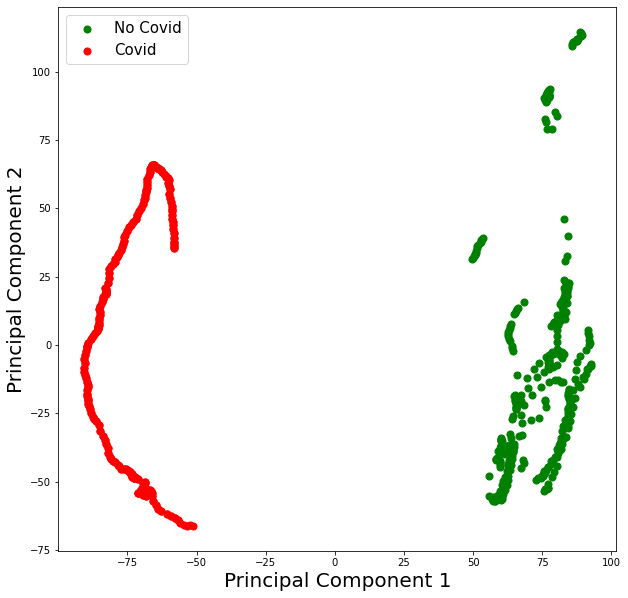

In [31]:
plt.figure(figsize=(10,10)) scatter
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)

targets=['No Covid','Covid']
colors=['g','r']
for target,color in zip(targets, colors):
    indicesToKeep= final_df['label']==target
    plt.scatter(data.loc[indicesToKeep, 0],
               data.loc[indicesToKeep, 1], c=color
                , s= 50)
plt.legend(targets, prop={"size":15})


#SCATTER PLOT WHERE 1= COVID, 0= NO COVID

sns.FaceGrid(data, hue="label", size=6).map(ply.scatter, 'pc1','pc2').add_legene


In [77]:
data['label']=c_target
data

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,label
0,-58.063556,35.600571,49.752376,-7.294260,10.491630,-12.952644,-12.950875,-2.929360,3.762358,-4.041458,...,-0.496021,-0.994154,5.157170,0.249236,2.287846,5.148150,-1.326657,0.768186,-0.675969,1.0
1,-58.118467,36.110379,50.036023,-7.135081,9.505158,-13.186584,-13.503228,-3.651411,3.171351,-4.401308,...,-0.028341,-1.139495,4.521298,1.335834,2.651007,5.158112,-0.838085,0.407469,0.265974,1.0
2,-58.146787,36.830606,50.271955,-6.648195,8.979516,-14.399743,-14.017103,-3.370374,3.373532,-4.628277,...,1.222743,-0.395686,1.637076,2.494594,2.420897,1.305904,-0.475355,1.920446,0.065257,1.0
3,-58.066896,37.653403,50.730719,-6.350780,8.355824,-14.656320,-14.650059,-2.423308,4.231525,-4.487154,...,1.395983,0.023467,-0.862256,1.322313,0.990358,-2.990313,0.632333,0.709762,-0.813897,1.0
4,-58.091471,39.256592,51.293752,-6.305025,7.445439,-14.623215,-16.076052,-2.066994,5.039816,-4.555174,...,0.585862,0.439089,-3.176247,-0.533144,-0.953173,-5.752704,2.161478,-1.405347,-0.799842,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,82.866567,-3.181299,26.437331,-29.686356,4.138660,25.327033,-12.601412,-19.952230,9.009103,-21.911421,...,-1.121195,0.402328,-2.425993,-0.168847,1.283646,-2.125202,-2.184789,-2.057351,1.129982,NaN
786,84.120854,-25.980994,-20.779715,7.657048,-2.760564,-27.922155,16.320880,43.805542,22.619471,-24.944783,...,-3.088149,0.884964,-0.682770,-2.424076,1.942353,1.756484,2.562591,2.678484,-1.725299,NaN
787,76.320897,-22.663262,23.311649,-26.731539,-23.940661,10.003800,16.175706,-33.621691,-6.997063,-21.210817,...,-2.589681,-2.256664,-1.096132,0.772312,3.435940,-2.287833,1.808337,0.567445,4.445832,NaN
788,77.514579,-8.759137,15.738044,-34.423990,-4.180730,27.193335,-16.522151,-21.908567,7.043948,-24.157018,...,0.545790,-1.807812,-0.484126,-0.247967,0.448492,2.722352,-0.477331,-0.655502,0.770578,NaN


In [94]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-1004.5,-986.25,-1016.00,-1005.00,-1005.00,-997.5,-1015.50,-995.75,-991.00,-991.75,...,-962.25,-966.50,-1005.50,-969.5,-1013.75,-961.75,-999.00,-999.50,-1004.25,1
1,-984.5,-977.00,-1004.50,-993.50,-992.75,-1015.5,-1018.50,-998.75,-1006.50,-1002.25,...,-979.75,-968.50,-1003.00,-968.0,-1002.25,-986.50,-1004.25,-988.00,-1006.25,1
2,-988.5,-996.25,-995.00,-988.75,-1003.75,-1007.0,-1003.25,-991.75,-1008.75,-1002.25,...,-994.00,-971.00,-1002.75,-961.0,-1017.50,-975.00,-1004.25,-993.50,-994.75,1
3,-998.0,-975.50,-1014.75,-991.00,-988.75,-1012.5,-1007.50,-1009.75,-991.50,-998.50,...,-993.00,-1001.25,-990.00,-974.5,-998.75,-989.75,-1007.00,-987.75,-973.25,1
4,-990.5,-973.75,-1000.75,-988.25,-971.50,-996.5,-993.00,-1006.25,-996.25,-990.75,...,-994.25,-1008.25,-991.25,-1005.5,-1000.00,-1010.00,-1001.50,-1003.25,-984.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0
786,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0
787,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0
788,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.0,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,0


In [108]:
new_data=[data[0], data[1], final_df['label']]
headers = ["PC1", "PC2","label"]

df3 = pd.concat(new_data, axis=1, keys=headers)
df3

,PC1,PC2,label
0,-58.080843,35.600430,1
1,-58.135703,36.110234,1
2,-58.164322,36.830479,1
3,-58.085006,37.653316,1
4,-58.109332,39.256487,1
...,...,...,...
785,82.878275,-3.179998,0
786,84.132873,-25.979751,0
787,76.334114,-22.662203,0
788,77.527528,-8.758085,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

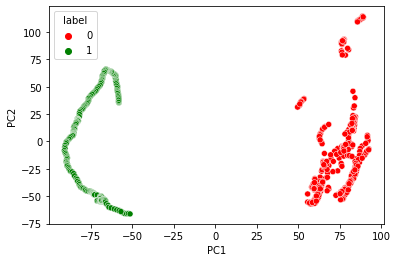

In [109]:
sns.scatterplot(x="PC1",y="PC2", data=df3, hue= 'label', palette=['red','green'], legend='full')

In [110]:
#from sklearn.manifold import TSNE
#covid_tsne= TSNE(n_components=2, random_state=0)

In [111]:
#tsne_obj=covid_tsne.fit_transform(data)
#tsne_obj



In [37]:
#covid_tsne_df= pd.DataFrame({'X':tsne_obj[:,0],
 #                     'Y':tsne_obj[:,1], 'covid':final_df['label']})

<AxesSubplot:xlabel='X', ylabel='Y'>

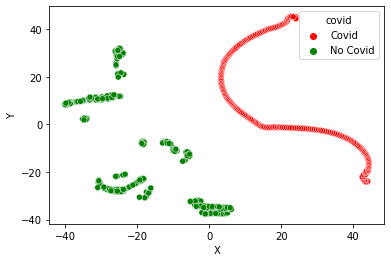

In [40]:
#plot

#sns.scatterplot(x="X",y="Y", data=covid_tsne_df, hue= 'covid', palette=['red','green'], legend='full')

In [ ]:
#